<a href="https://colab.research.google.com/github/atroitskaia/CollegeBasketballSalaryPrediction/blob/main/Salary_prediction_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modeling
This notebok contains mashine learning models for further data exploration.


In [21]:
import os
from google.colab import data_table

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from datetime import datetime

import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay # Import PartialDependenceDisplay

import seaborn as sns



# from vega_datasets import data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_table.enable_dataframe_formatter()

data_table.DataTable.max_columns = 300  # Set the maximum number of columns to display

In [5]:
# Read the csv file

data = pd.read_csv('/content/drive/MyDrive/BrainStation/BrainStation Projects/BS-Capstone-Project/datasets/data/backetball_cleaned_09_12_24.csv')

## Linera Regression Model

Target variable Year 1 salary

Features Selection for Linear Regression Model:

* PTS (Points): This is a key offensive statistic that often correlates with a player's value and potential salary.
* G (Games Played): This indicates durability and consistency, which are valuable traits for NBA teams.
* MP (Minutes Played): This shows how much a player is trusted on the court, which can be indicative of their skill level and potential value.
* FG% (Field Goal Percentage), 3P% (Three-Point Percentage), FT% (Free Throw Percentage): These shooting percentages are crucial indicators of a player's offensive efficiency.
* TRB (Total Rebounds): Rebounding is a valuable skill that contributes to both offense and defense.
* AST (Assists): This stat is particularly important for guards and indicates playmaking ability.
* STL (Steals) and BLK (Blocks): These defensive stats can significantly impact a player's value.
* Draft Year: This could potentially capture trends in salary over time or how recent draft picks are valued.


In [9]:
# Selecting features and target variable

features = ['PTS', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'Draft Year']
target = 'Year 1'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialized and train

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred = lin_reg_model.predict(X_test)

In [11]:
# Calculating Mean Squared Error and R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)


In [17]:
print(f"Mean Square Error: {mse}")
print (f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Square Error: 2489678223325.138
R-squared: 0.24166852310179154
Root Mean Squared Error: 1577871.421670707


Root Mean Squared Error (RMSE): 1,577,871.421670707
* Scale of Error: On average, model's predictions are off by about $1,577,871. This is a substantial amount, especially for rookie contracts.

* Context: To fully interpret this, we need to know the range and distribution of Year 1 salaries.

* Practical Significance: For NBA teams or players, a difference of $1.58 million in salary predictions could have major implications for budget planning, negotiations, and decision-making.

* Weak Predictive Power: The R-squared of 0.2417 indicates that the model explains only about 24.17% of the variance in Year 1 salaries. This low explanatory power is reflected in the high RMSE.

* Large Errors: The RMSE suggests that the model's predictions can be significantly off, which limits its practical usefulness in its current state.

* Non-linear Relationships: The combination of a

*   List item
*   List item

low R-squared and high RMSE could indicate that there are important non-linear relationships in the data that the linear regression model isn't capturing.

Year 1 Salary Statistics:
count    5.940000e+02
mean     1.999566e+06
std      1.851797e+06
min      7.500000e+04
25%      6.737500e+05
50%      1.378242e+06
75%      2.582160e+06
max      1.105512e+07
Name: Year 1, dtype: float64

Range of Year 1 Salaries: $10,980,120.00


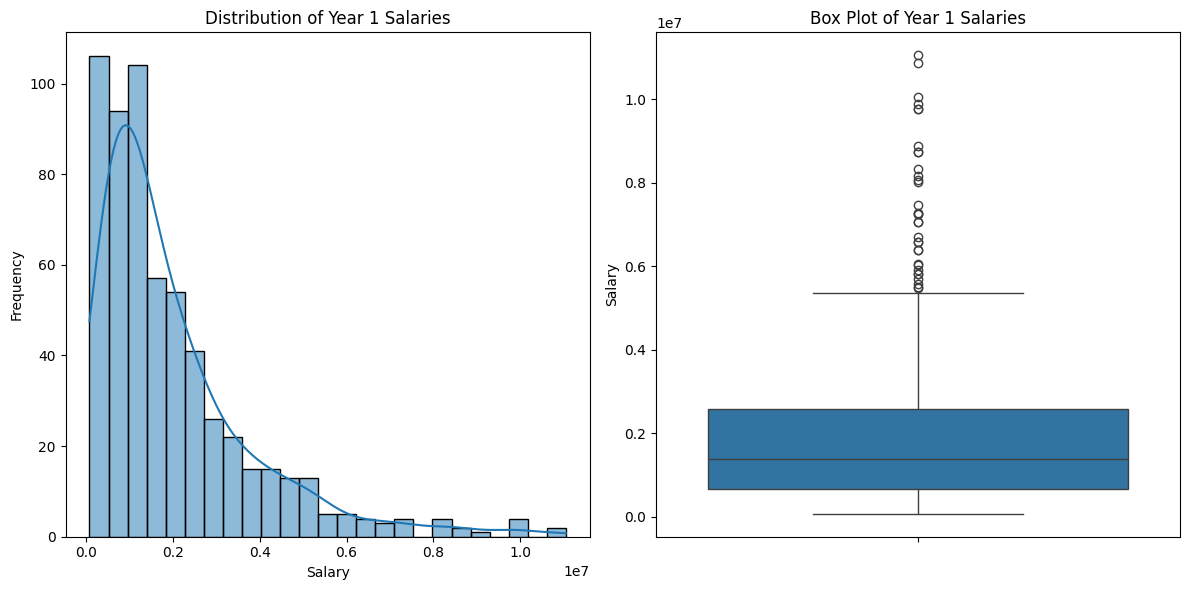

<ipython-input-18-0ca83b33defc>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Year 1'], shade=True)


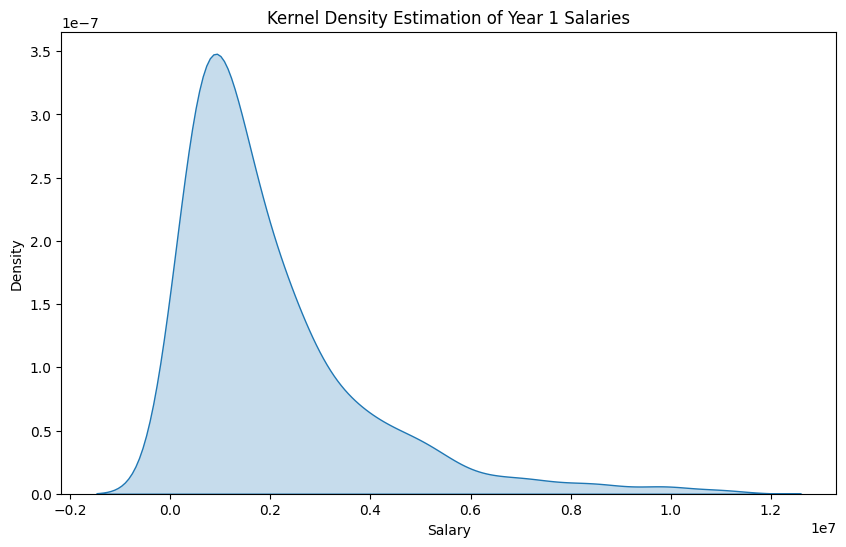

In [18]:
# Basic statistics
year1_stats = data['Year 1'].describe()
print("Year 1 Salary Statistics:")
print(year1_stats)
# Range
salary_range = data['Year 1'].max() - data['Year 1'].min()
print(f"\nRange of Year 1 Salaries: ${salary_range:,.2f}")

# Visualization
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['Year 1'], kde=True)
plt.title('Distribution of Year 1 Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# # Box plot
# plt.subplot(122)
# sns.boxplot(y=data['Year 1'])
# plt.title('Box Plot of Year 1 Salaries')
# plt.ylabel('Salary')

# plt.tight_layout()
# plt.show()

# Additional visualization: Kernel Density Estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Year 1'], shade=True)
plt.title('Kernel Density Estimation of Year 1 Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

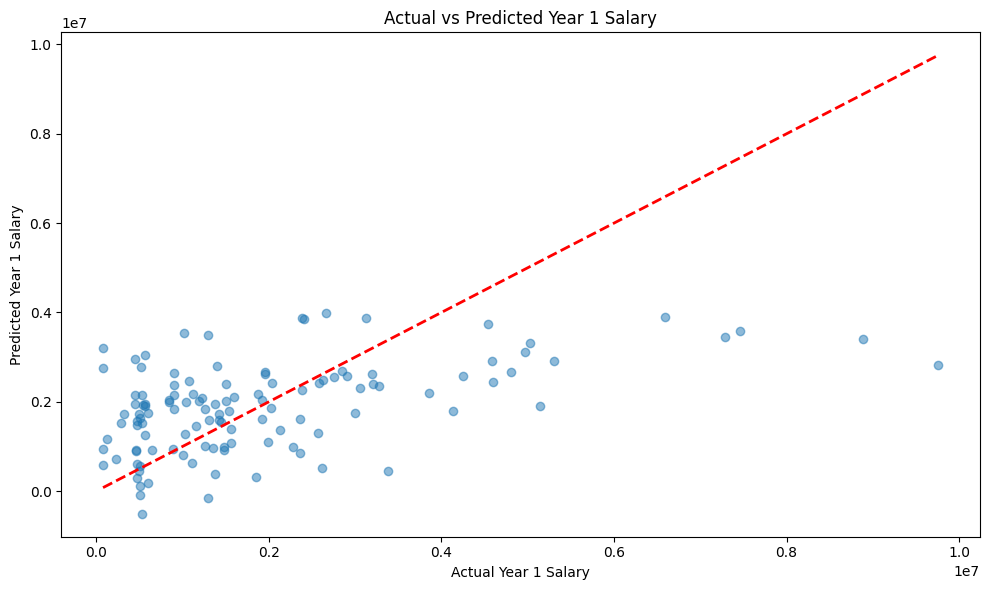

In [13]:
# Plot the predicted vs actual

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Year 1 Salary")
plt.ylabel("Predicted Year 1 Salary")
plt.title("Actual vs Predicted Year 1 Salary")
plt.tight_layout()
plt.show()

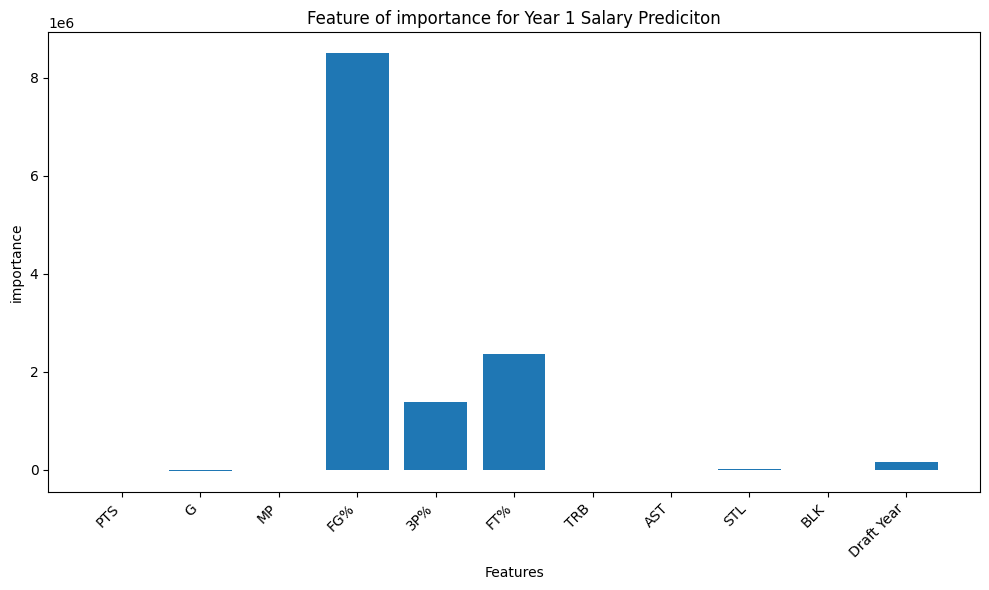

In [14]:
# Check the features importance that were selected for this model

feature_importance = pd.DataFrame({'feature': features, 'importance': lin_reg_model.coef_})

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("importance")
plt.title("Feature of importance for Year 1 Salary Prediciton")
plt.tight_layout()
plt.show()

In [15]:
# Let's look at correlation with year 1 salary

correlation = data.corr()['Year 1'].abs().sort_values(ascending=False)

top_features = correlation[1:11].index.tolist()

print("Top 10 features by correlation with Year 1 Salary")
print(top_features)

Top 10 features by correlation with Year 1 Salary
['Year 2', 'Pick', 'Round_1', 'Round_2', 'Year 3', 'Log_Average_Salary', 'Standing Ver Leap_missing', '3 Quarter Sprint_missing', 'Weight (lbs)_missing', 'From_Year']


# Random Forest model

Mean Squared Error: 2330294243730.0923
Root Mean Squared Error: 1526530.1319430587
R-squared: 0.29021531421233115


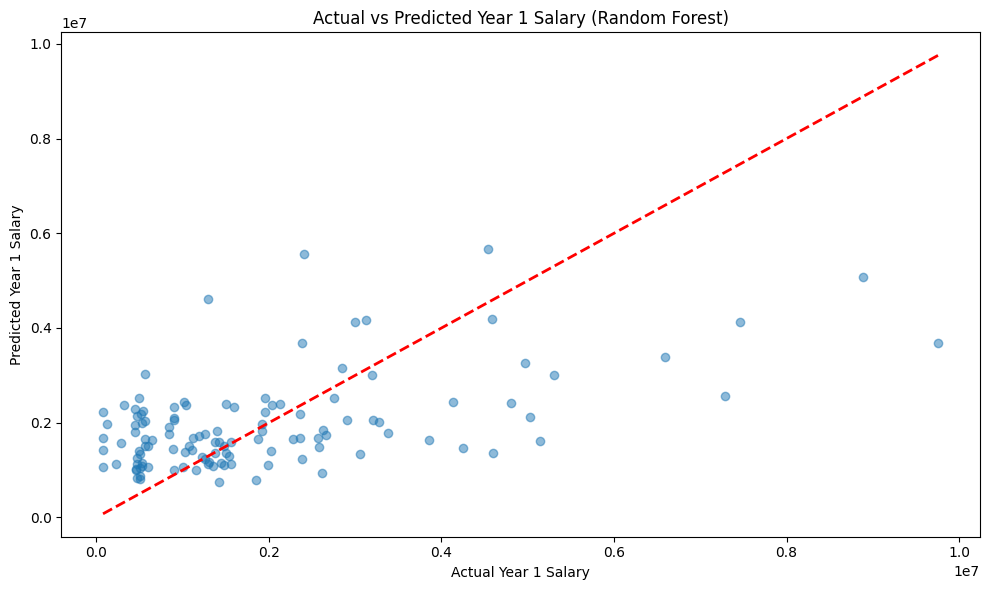

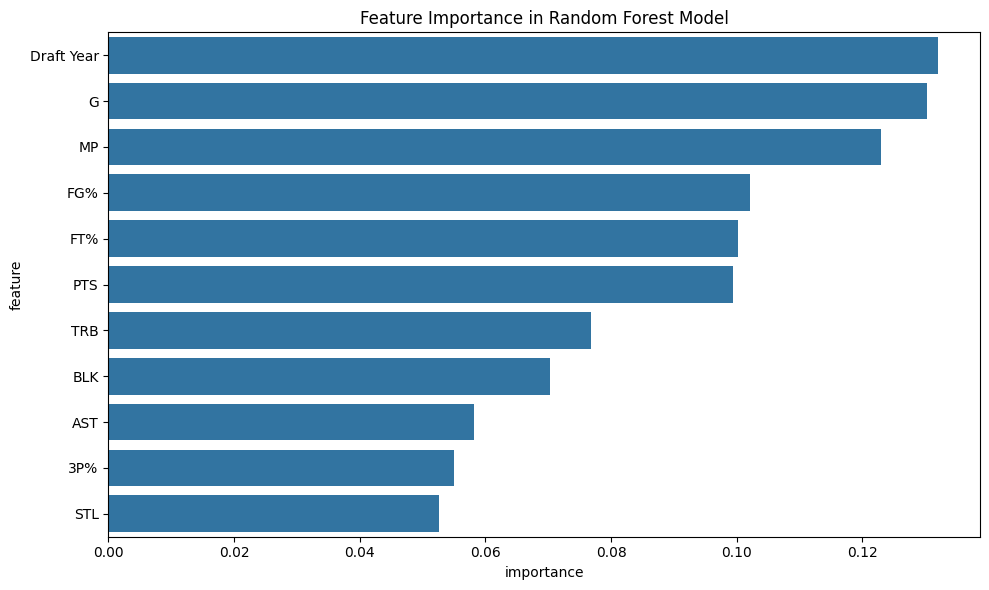

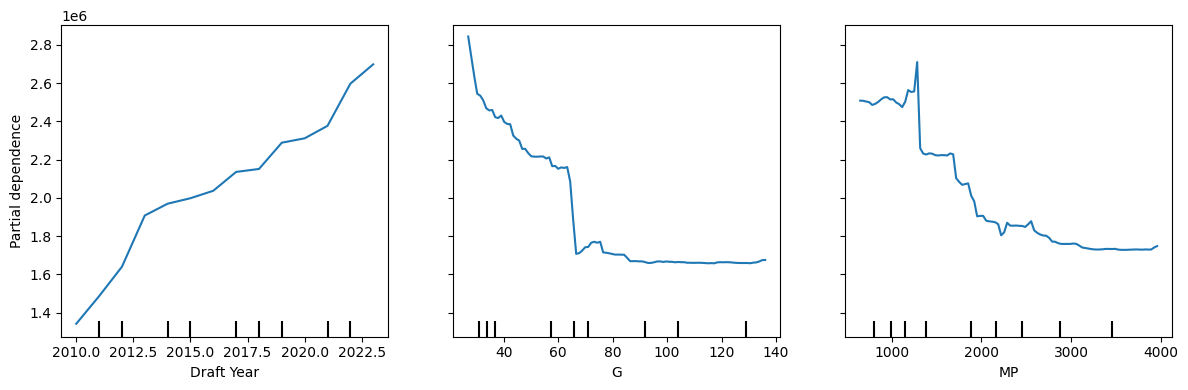

In [23]:
features1 = ['PTS', 'G', 'MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'Draft Year']
X = data[features1]
y = data['Year 1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Year 1 Salary")
plt.ylabel("Predicted Year 1 Salary")
plt.title("Actual vs Predicted Year 1 Salary (Random Forest)")
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()

# # Partial dependence plots for top 3 features
# from sklearn.inspection import partial_dependence, plot_partial_dependence

top_features = feature_importance['feature'][:3].tolist()
fig, ax = plt.subplots(figsize=(12, 4))
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, top_features, ax=ax
)
plt.tight_layout()
plt.show()